In [4]:
imag=cv2.imread('road_lane.png')
cv2.imshow('test',imag)
if cv2.waitKey(0) == 27:  
    cv2.destroyAllWindows()

In [5]:
gray = cv2.imread('road_lane.png', 0)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

cv2.imshow('Grayscale', gray)
cv2.imshow('Blurred', blur)
if cv2.waitKey(0) == 27:  #always add these steps or the imshow window will be blank
    cv2.destroyAllWindows()

In [8]:
edges = cv2.Canny(blur, 50, 150)##edge detection as well as thresholding 
cv2.imshow('Edges', edges)
if cv2.waitKey(0) == 27:  
    cv2.destroyAllWindows()

In [9]:
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)  # Black image, same size as input
    cv2.fillPoly(mask, [vertices], 255)  # Fill polygon with white
    return cv2.bitwise_and(img, mask)  # Apply mask


In [ ]:
height, width = edges.shape[:2]
roi_vertices = np.array([
    (100, height),
    (width // 2 - 50, height // 2 + 50),
    (width // 2 + 50, height // 2 + 50),
    (width - 100, height)
], np.int32)

cropped_edges = region_of_interest(edges, roi_vertices)


In [1]:
import cv2
import numpy as np

# Load a sample frame
image=cv2.imread('road_lane.png')

# Get frame dimensions
height, width = image.shape[:2]

# Define polygon (trapezoid) vertices
roi_vertices = np.array([
    (100, height),                        # Bottom-left
    (width // 2 - 50, height // 2 + 50),  # Top-left
    (width // 2 + 50, height // 2 + 50),  # Top-right
    (width - 100, height)                 # Bottom-right
], np.int32)

# Draw the polygon on the frame (blue line, thickness 2)
polygon_frame = image.copy()
cv2.polylines(polygon_frame, [roi_vertices], isClosed=True, color=(255, 0, 0), thickness=2)

# Show the result
cv2.imshow("ROI Polygon", polygon_frame)
if cv2.waitKey(0) == 27:  
    cv2.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/vnayakde/Desktop/lane_obstacle_detection/opecv_env/lib/python3.10/site-packages/cv2/qt/plugins"


In [7]:
import numpy as np
def get_dynamic_roi_vertices(width, height):
    """
    Returns a trapezoidal region of interest (ROI) based on image size.
    Adjust the percentages for different ROI shapes.
    """
    return np.array([[
        (int(0.10 * width), height),                  # Bottom-left
        (int(0.45 * width), int(0.60 * height)),      # Top-left
        (int(0.55 * width), int(0.60 * height)),      # Top-right
        (int(0.90 * width), height)                   # Bottom-right
    ]], dtype=np.int32)


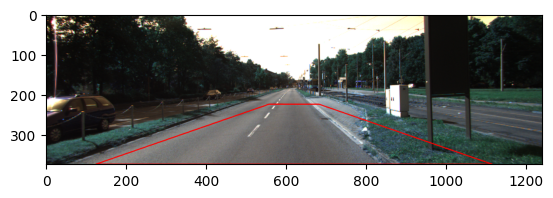

In [11]:


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
frame = cv2.imread('road_lane.png')  
height, width = frame.shape[:2]

roi_vertices = get_dynamic_roi_vertices(width, height)


polygon_frame = frame.copy()
cv2.polylines(polygon_frame, [roi_vertices], isClosed=True, color=(255, 0, 0), thickness=2)


imgplot = plt.imshow(polygon_frame)
plt.show() 


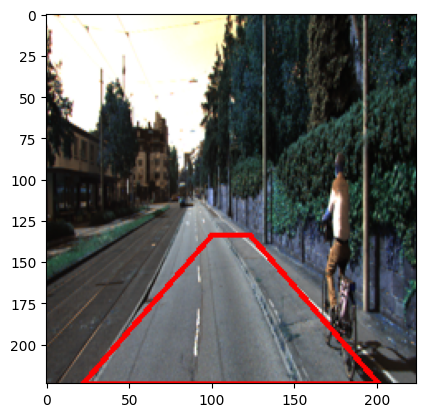

In [9]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
frame = cv2.imread('road_lane2.png')  
height, width = frame.shape[:2]

roi_vertices = get_dynamic_roi_vertices(width, height)


polygon_frame = frame.copy()
cv2.polylines(polygon_frame, [roi_vertices], isClosed=True, color=(255, 0, 0), thickness=2)


imgplot = plt.imshow(polygon_frame)
plt.show() 


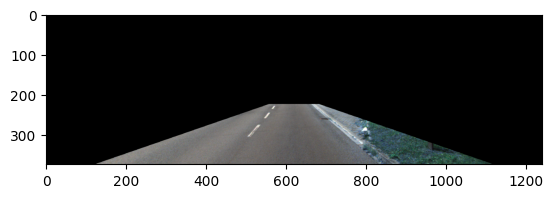

In [ ]:

mask = np.zeros_like(frame)


mask_color = (255,) * frame.shape[2]  # (255, 255, 255) for color image

# Fill the ROI polygon with white
cv2.fillPoly(mask, roi_vertices, mask_color)

masked_image = cv2.bitwise_and(frame, mask)

imgplot = plt.imshow(masked_image)
plt.show() 



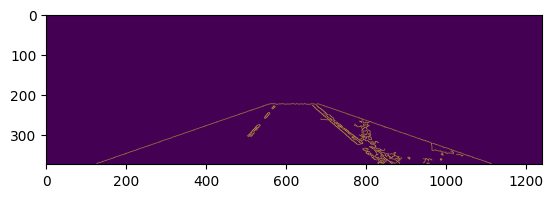

In [13]:
gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, threshold1=50, threshold2=150)

imgplot = plt.imshow(edges)
plt.show() 


In [1]:
'''lines = cv2.HoughLinesP(
    edges,                   # Edge-detected binary image
    rho=1,                   # Distance resolution in pixels
    theta=np.pi / 180,       # Angle resolution in radians
    threshold=50,            # Minimum number of votes (intersections in Hough grid cell)
    minLineLength=100,       # Minimum length of a line to be detected
    maxLineGap=50            # Maximum gap between line segments to treat them as a single line
)'''

'lines = cv2.HoughLinesP(\n    edges,                   # Edge-detected binary image\n    rho=1,                   # Distance resolution in pixels\n    theta=np.pi / 180,       # Angle resolution in radians\n    threshold=50,            # Minimum number of votes (intersections in Hough grid cell)\n    minLineLength=100,       # Minimum length of a line to be detected\n    maxLineGap=50            # Maximum gap between line segments to treat them as a single line\n)'

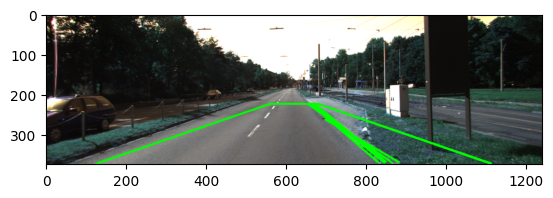

In [ ]:
lines = cv2.HoughLinesP(
    edges,                   
    rho=1,                   
    theta=np.pi / 180,       
    threshold=50,            
    minLineLength=100,       
    maxLineGap=50            
)
for line in lines:
    x1, y1, x2, y2 = line[0]  
    cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

imgplot = plt.imshow(frame)
plt.show()

In [1]:
import cv2
import numpy as np

def canny_edge_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    return cv2.Canny(blur, 50, 150)

def region_of_interest(image):
    height, width = image.shape[:2]
    mask = np.zeros_like(image)
    polygon = np.array([[
        (int(width * 0.1), height),
        (int(width * 0.4), int(height * 0.6)),
        (int(width * 0.6), int(height * 0.6)),
        (int(width * 0.9), height),
    ]], dtype=np.int32)
    cv2.fillPoly(mask, polygon, 255)
    return cv2.bitwise_and(image, mask)

def detect_lines(image):
    return cv2.HoughLinesP(image, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

def average_slope_intercept(lines, image_height):
    left, right = [], []
    if lines is None:
        return []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if x2 - x1 == 0:
            continue
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        if abs(slope) < 0.5:
            continue
        if slope < 0:
            left.append((slope, intercept))
        else:
            right.append((slope, intercept))
    y1, y2 = image_height, int(image_height * 0.6)

    def make_coords(slope, intercept):
        x1 = int((y1 - intercept) / slope)
        x2 = int((y2 - intercept) / slope)
        return [x1, y1, x2, y2]

    lines_to_draw = []
    if left:
        avg = np.mean(left, axis=0)
        lines_to_draw.append(make_coords(*avg))
    if right:
        avg = np.mean(right, axis=0)
        lines_to_draw.append(make_coords(*avg))
    return lines_to_draw

def display_lines(image, lines):
    line_img = np.zeros_like(image)
    for x1, y1, x2, y2 in lines:
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 8)
    return cv2.addWeighted(image, 0.8, line_img, 1, 1)


In [ ]:
cap = cv2.VideoCapture("test2.mp4")  
output = cv2.VideoWriter('output_lane_detected.mp4', 
                         cv2.VideoWriter_fourcc(*'mp4v'), 
                         20, 
                         (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    edges = canny_edge_detector(frame)
    roi = region_of_interest(edges)
    lines = detect_lines(roi)
    averaged_lines = average_slope_intercept(lines, frame.shape[0])
    final = display_lines(frame, averaged_lines)

    output.write(final)
    cv2.imshow("Lane Detection", final)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
output.release()
cv2.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/vnayakde/Desktop/lane_obstacle_detection/opecv_env/lib/python3.10/site-packages/cv2/qt/plugins"
